<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",100)
%matplotlib inline

# Data Gathering

In [27]:
df= pd.read_csv("car_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [28]:
df.shape

(301, 9)

# Data Preparation

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [30]:
df['car_age'] = 2022-df.Year

In [31]:
df.drop(columns=['Car_Name','Year'], inplace=True)

# Feature Engineering

In [32]:
df=pd.get_dummies(df, drop_first=True)

In [33]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [34]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

### Splitting data into training and testing

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


##  Model Building (Linear Regression)

In [38]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = lm.predict(X_test)

In [41]:
X_test

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
177,0.57,24000,0,6,0,1,1,0
289,13.60,10980,0,6,0,1,0,1
228,9.40,60000,0,10,1,0,0,1
198,0.57,35000,1,11,0,1,1,1
60,18.61,40001,0,9,0,1,0,1
...,...,...,...,...,...,...,...,...
234,5.70,4492,0,7,0,1,0,1
296,11.60,33988,0,6,1,0,0,1
281,7.60,50456,0,16,0,1,0,1
285,8.50,15059,0,6,0,1,0,0


In [42]:
y_pred

array([ 2.95534303,  8.178939  ,  6.45427257, -1.42417501,  9.08889914,
        7.41825441,  1.33644285,  0.84027217,  1.36501949,  7.49026806,
        9.11830017,  0.58573931,  8.41612774,  3.42316502,  6.90043281,
        3.04988309,  0.48448171, 10.70970753,  1.75207005,  2.34571752,
        0.39746889,  8.11925338,  6.62469317,  2.65939066,  0.78280554,
        3.69330765,  5.24815462,  2.82676351,  2.13640446,  1.75237686,
        0.39730155,  9.11750503, -0.66188053,  2.29098014,  8.57067341,
        4.4910324 ,  7.20530369,  7.53824015,  2.89101139,  7.93588794,
        3.93585154,  4.27133211,  4.33205704,  0.6008847 ,  7.34025071,
        0.47602539,  7.29187681, 11.23125597,  3.13805132,  5.38262985,
        6.7988422 ,  2.17888955, 20.63303305, 17.0015261 ,  7.50717349,
        9.69621308,  4.47478116,  8.97377615,  1.82294639,  7.60416734,
        0.22226536])

In [43]:
lm.coef_

array([ 4.29152503e-01, -6.15725866e-06, -9.03759824e-01, -3.53801365e-01,
        2.53327258e+00,  7.38464226e-01, -1.19059291e+00, -1.63902155e+00])

In [44]:
lm.intercept_

5.433437186715789

In [45]:
sum(X_test.loc[177] * lm.coef_) + lm.intercept_

2.955343034845747

# Interpret the model

In [46]:
pd.DataFrame(lm.coef_,X_train.columns, columns=["Coefs_"])

,Coefs_
Present_Price,0.429153
Kms_Driven,-0.000006
Owner,-0.903760
car_age,-0.353801
Fuel_Type_Diesel,2.533273
Fuel_Type_Petrol,0.738464
Seller_Type_Individual,-1.190593
Transmission_Manual,-1.639022


# Model Evaluation

In [47]:
y_pred = lm.predict(X_test)

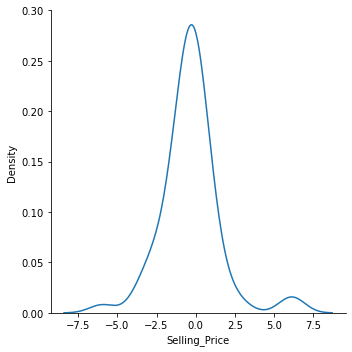

In [48]:
residuals = y_test-y_pred
sns.displot(residuals, kind="kde");

In [49]:
f"{len(residuals[residuals>0])} low + {len(residuals[residuals<0])} high = {len(X_test)}"

'25 low + 36 high = 61'

In [50]:
# y_pred = lr_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"residuals":residuals})
results.sort_values(by="residuals",ascending=False)

,Actual,Predicted,residuals
97,17.00,10.709708,6.290292
82,23.00,17.001526,5.998474
63,23.50,20.633033,2.866967
289,10.11,8.178939,1.931061
198,0.15,-1.424175,1.574175
...,...,...,...
77,1.50,4.271332,-2.771332
173,0.40,3.423165,-3.023165
57,4.75,7.935888,-3.185888
90,3.80,7.538240,-3.738240


In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
def eval_model(y_test,y_pred):
    rmse=(mean_squared_error(y_test,y_pred)**.5)
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print(f"rmse:\t\t{rmse }")
    print(f"mae:\t\t{mae }")
    print(f"R2_score:\t{R2_score }")
    return R2_score

In [55]:
eval_model(y_test,y_pred), "train R2: ",lm.score(X_train, y_train),"test R2: ",lm.score(X_test, y_test)

rmse:		1.8651552135513736
mae:		1.2162256821297
R2_score:	0.848981302489908


(0.848981302489908,
 'train R2: ',
 0.8886517300804564,
 'test R2: ',
 0.848981302489908)

# Regularization

# Ridge

In [56]:
from sklearn.linear_model import Ridge,RidgeCV

In [58]:
ridge_model = Ridge( random_state=101)

In [59]:
ridge_model

Ridge(random_state=101)

In [60]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [61]:
ridge_model.alpha

1.0

In [62]:
alpha_space = np.linspace(0.01,1.100)
alpha_space

array([0.01      , 0.0322449 , 0.0544898 , 0.07673469, 0.09897959,
       0.12122449, 0.14346939, 0.16571429, 0.18795918, 0.21020408,
       0.23244898, 0.25469388, 0.27693878, 0.29918367, 0.32142857,
       0.34367347, 0.36591837, 0.38816327, 0.41040816, 0.43265306,
       0.45489796, 0.47714286, 0.49938776, 0.52163265, 0.54387755,
       0.56612245, 0.58836735, 0.61061224, 0.63285714, 0.65510204,
       0.67734694, 0.69959184, 0.72183673, 0.74408163, 0.76632653,
       0.78857143, 0.81081633, 0.83306122, 0.85530612, 0.87755102,
       0.89979592, 0.92204082, 0.94428571, 0.96653061, 0.98877551,
       1.01102041, 1.03326531, 1.0555102 , 1.0777551 , 1.1       ])

In [63]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [64]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01      , 0.0322449 , 0.0544898 , 0.07673469, 0.09897959,
       0.12122449, 0.14346939, 0.16571429, 0.18795918, 0.21020408,
       0.23244898, 0.25469388, 0.27693878, 0.29918367, 0.32142857,
       0.34367347, 0.36591837, 0.38816327, 0.41040816, 0.43265306,
       0.45489796, 0.47714286, 0.49938776, 0.52163265, 0.54387755,
       0.56612245, 0.58836735, 0.61061224, 0.63285714, 0.65510204,
       0.67734694, 0.69959184, 0.72183673, 0.74408163, 0.76632653,
       0.78857143, 0.81081633, 0.83306122, 0.85530612, 0.87755102,
       0.89979592, 0.92204082, 0.94428571, 0.96653061, 0.98877551,
       1.01102041, 1.03326531, 1.0555102 , 1.0777551 , 1.1       ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [65]:
ridge_cv_model.alpha_

0.01

In [66]:
ridge_cv_model.best_score_

-1.9410612823023368

In [67]:
y_pred = ridge_cv_model.predict(X_test)
y_pred

array([ 2.95482914,  8.17908814,  6.45348799, -1.42360623,  9.08915367,
        7.41756474,  1.33667433,  0.84039303,  1.36523984,  7.4895739 ,
        9.11771239,  0.58588513,  8.41536796,  3.42265162,  6.8996671 ,
        3.04965392,  0.48454353, 10.7100985 ,  1.75232928,  2.34601164,
        0.39754212,  8.11858477,  6.62385093,  2.65897236,  0.78296611,
        3.69304089,  5.24810442,  2.8264212 ,  2.13670493,  1.75264297,
        0.39738533,  9.11700625, -0.66191784,  2.29057485,  8.57010807,
        4.49087407,  7.20547168,  7.53834003,  2.89074756,  7.93601021,
        3.93558662,  4.27033352,  4.33184198,  0.60107366,  7.33953034,
        0.47615861,  7.29198643, 11.23085172,  3.1377389 ,  5.38172714,
        6.79797355,  2.17917564, 20.63265082, 17.00076542,  7.50654215,
        9.69564716,  4.47455872,  8.97322361,  1.82244269,  7.60336992,
        0.22237024])

In [69]:
eval_model(y_test,y_pred)

rmse:		1.865061326771382
mae:		1.2161661635391818
R2_score:	0.8489965058384201


0.8489965058384201

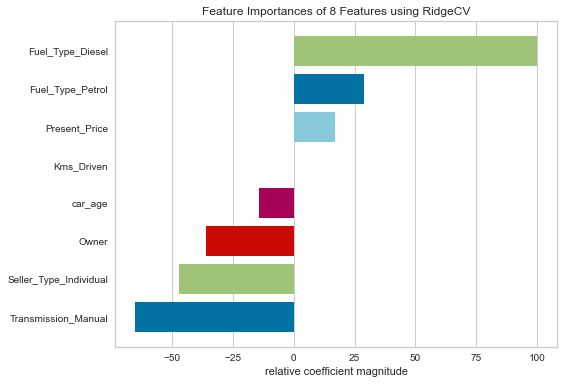

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [70]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [71]:
 from sklearn.linear_model import Lasso, LassoCV

In [72]:
lasso_model = Lasso(alpha=1, random_state=101)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, random_state=101)

In [73]:
y_pred = lasso_model.predict(X_test)

In [74]:
eval_model(y_test,y_pred)

rmse:		2.154165624047066
mae:		1.4714179283504278
R2_score:	0.7985538621024054


0.7985538621024054

In [75]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=101)

In [76]:
lasso_cv_model.fit(X_train,y_train)
y_pred = lasso_cv_model.predict(X_test)

In [78]:
eval_model(y_test,y_pred)

rmse:		1.8539412620191646
mae:		1.20764432704656
R2_score:	0.8507917956242985


0.8507917956242985

In [79]:
lasso_cv_model.alpha_

0.01

## Elastic-Net 

In [80]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [82]:
elastic_model = ElasticNet(random_state=101)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=101)

In [83]:
y_pred = elastic_model.predict(X_test)

In [84]:
eval_model(y_test,y_pred)

rmse:		2.098730303104542
mae:		1.4234255674689693
R2_score:	0.8087884906376239


0.8087884906376239

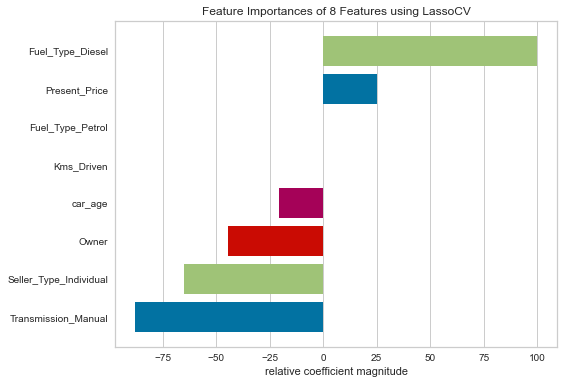

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [85]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()